# **Homework 3**

Student :- Gauri Damle\
NUID :- NU002931881


## Importing Modules

In [ ]:
#import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import random
from sklearn.utils import shuffle
import statsmodels.api as sm
import itertools
import time


#Preprocessing methods
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Input Data

In [ ]:
dfDataset = pd.read_csv('/content/drive/MyDrive/SemesterThree/Stats7300/Assignment3/houseprices.csv')

In [ ]:
dfDataset.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [ ]:
dfDataset.info()
# No null data
# The datatype of all features is integer except for the last two columns 
  # - Brick
  # - Neighborhood

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


## Converting text into columns

####Brick and Neighborhood are categorical variables of object data type need to be converted to numerical values using techniques like

*   LableEncoding
*   OneHotEncoding
*   Mapping function



In [ ]:
dfDataset['Brick'].value_counts()

No     86
Yes    42
Name: Brick, dtype: int64

In [ ]:
dfDataset['Brick'] = dfDataset['Brick'].map({"No":0, "Yes":1})

In [ ]:
dfDataset['Neighborhood'].value_counts()

East     45
North    44
West     39
Name: Neighborhood, dtype: int64

In [ ]:
directions = {'East':0, 'North':1, 'West':2}
dfDataset['Neighborhood'] = dfDataset['Neighborhood'].map(directions)

In [ ]:
dfDataset.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125,0.328125,0.953125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324,0.471376,0.811913
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000,0.000000,0.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000,0.000000,0.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000,0.000000,1.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000,1.000000,2.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000,1.000000,2.000000


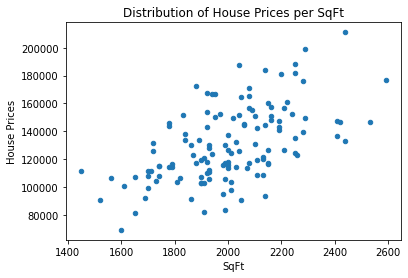

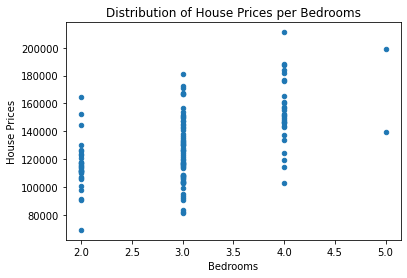

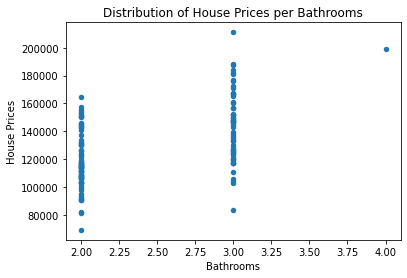

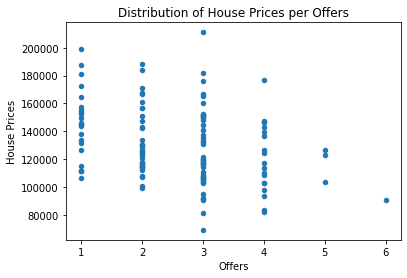

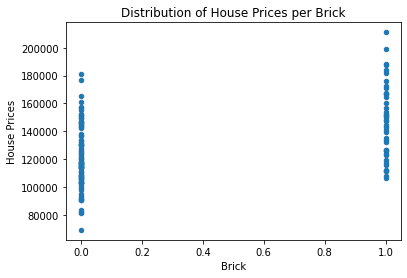

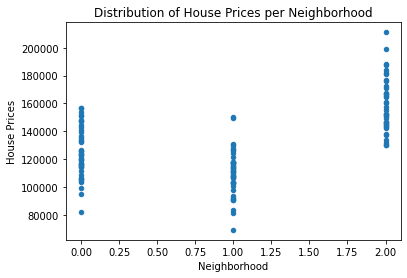

In [ ]:
features = ["SqFt",	"Bedrooms",	"Bathrooms",	"Offers",	"Brick",	"Neighborhood"]
for i in range(0,6):
  dfDataset.plot(kind = 'scatter', x=features[i], y='Price')
  plt.xlabel(features[i]) 
  plt.ylabel('House Prices') 
  plt.title('Distribution of House Prices per '+features[i])
  plt.show()

## Define features and labels

In [ ]:
dfDataset.shape

(128, 8)

In [ ]:
# 'Home' column can be dropped as it is nothing but an index
dfDataset = dfDataset.drop('Home', axis = 1)

In [ ]:
dfDataset

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,0,0
1,114200,2030,4,2,3,0,0
2,114800,1740,3,2,1,0,0
3,94700,1980,3,2,3,0,0
4,119800,2130,3,3,3,0,0
...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,1,0
124,147900,2160,4,3,3,1,0
125,113500,2070,2,2,2,0,1
126,149900,2020,3,3,1,0,2


In [ ]:
#Data contains 6 feature variables and 1 target variable price
# Define features and labels

y = dfDataset.iloc[:,0].values

In [ ]:
y.shape

(128,)

In [ ]:
x = dfDataset.drop('Price', axis = 1)

In [ ]:
x

,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1790,2,2,2,0,0
1,2030,4,2,3,0,0
2,1740,3,2,1,0,0
3,1980,3,2,3,0,0
4,2130,3,3,3,0,0
...,...,...,...,...,...,...
123,1900,3,3,3,1,0
124,2160,4,3,3,1,0
125,2070,2,2,2,0,1
126,2020,3,3,1,0,2


## Scaling Dataset

In [ ]:
# Scale the dataset
sc = StandardScaler()
x = sc.fit_transform(x)

 To normalize dataset features and reduce variance in dataset points

# **Question1**

1. Create a custom linear regression model using the house pricing dataset(houseprices.csv  Download houseprices.csv)

 a) Split the dataset into training and test dataset 80:20

 b) Custom linear regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

 c) Predict the house prices using test dataset

 d) Show the predicted output, and loss function output plots

 e) Calculate the RMSE and R2 metrics


## a) Split the dataset into training and test dataset 80:20

In [ ]:
# Out of 128 rows in the dataset 102 are passed to training and remaining 26 are test dataset
# This is done as per 80:20 split asked in question 
# Separate the dataset into training and testing

x, y = shuffle(x, y, random_state=0)
Xtrain =x[0:102,:]
Xtest = x[102:]

In [ ]:
Xtrain.shape

(102, 6)

In [ ]:
Xtest.shape

(26, 6)

In [ ]:
Ytrain = y [0:102]
Ytest = y[102:]

In [ ]:
Ytrain.shape

(102,)

In [ ]:
Ytest.shape

(26,)

## b) Custom linear regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

In [ ]:
class linear_regression():
  # constructor of class
  def __init__(self):
    pass

  # calculate cost
  def CostFunction(self, x,y,w,b):
      cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
      return cost

  # Training model with Xtrain and Ytrain and calculating weights, bias and cost function
  def train(self, x, y, w, b, learning_rate, epochs):
      cost_list = [0] * epochs
      for epoch in range(epochs):
          z = x.dot(w) + b
          loss = z - y
          weight_gradient = x.T.dot(loss) / len(y)
          bias_gradient = np.sum(loss) / len(y)
          
          w = w - learning_rate*weight_gradient
          b = b - learning_rate*bias_gradient
    
          cost = self.CostFunction(x, y, w, b)
          cost_list[epoch] = cost
          
          if (epoch%(epochs/10)==0):
              print("Cost at epoch",epoch,"is:",cost)
          
      return w, b, cost_list

  # Predicting labels with the calculated weights and biases
  def predict(self, X, w, b):
    return X.dot(w) + b

  #Calculating the r² accuracy 
  def r2score(self, y_pred, y):
      # variation around the fit
      rss = np.sum((y_pred - y) ** 2)
      # variation around mean
      tss = np.sum((y-y.mean()) ** 2)
      r2 = 1 - (rss / tss)
      return r2
    
  #Calculating Root mean square error
  def rmse(self, y_pred, y):
    return np.sqrt(((y_pred - y) ** 2).mean())

In [ ]:
Xtrain.shape[0]

102

In [ ]:
lr = linear_regression()
# Calculating weights and bias
w, b, c = lr.train(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=10000)

Cost at epoch 0 is: 8567803160.959897
Cost at epoch 1000 is: 224194355.76394254
Cost at epoch 2000 is: 59379197.906264246
Cost at epoch 3000 is: 54720974.5240946
Cost at epoch 4000 is: 54351060.53829433
Cost at epoch 5000 is: 54289339.29837498
Cost at epoch 6000 is: 54277392.104366794
Cost at epoch 7000 is: 54275034.58176182
Cost at epoch 8000 is: 54274567.802010894
Cost at epoch 9000 is: 54274475.271994576


## c) Predict the house prices using test dataset

In [ ]:
y_pred = lr.predict(Xtest, w, b)

## d) Show the predicted output, and loss function output plots

In [ ]:
y_pred

array([104323.93931658, 113616.58913881, 131013.03102559, 114053.03700689,
       156997.34723695, 174335.46232373,  95623.75426379, 157829.13656196,
       164244.75923407, 115527.38441871, 181690.61239146, 130729.09955982,
        98959.97176893, 130407.72250796, 143986.0159697 , 162085.61680147,
       148351.14611237, 130703.59698487, 142645.82103599, 149582.88715985,
       113178.25732433, 133470.80802312, 120287.8560183 , 147847.15475228,
       164023.11655598, 100146.94558022])

### Plotting the loss function

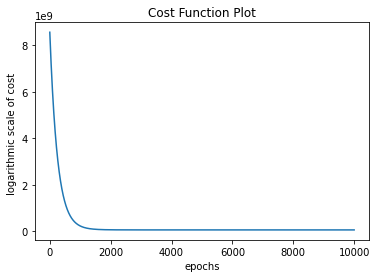

In [ ]:
# Plotting the cost
plt.plot(c)
plt.xlabel('epochs')
plt.ylabel('logarithmic scale of cost ')
plt.title('Cost Function Plot')
plt.show()

As epochs approach 2000 the cost funtion is minimized and graph is constant after that

## e) Calculate the RMSE and R2 metrics

In [ ]:
lr.r2score(y_pred, Ytest)

0.8457955422764362

The R2 value shows that the independent variables in the model (square footage, # bathrooms, and # bedrooms etc) are able to explain 84% of the variation in the house prices.

In [ ]:
lr.rmse(y_pred, Ytest)

9992.347229054558

The RMSE value tells that the average deviation between the predicted house price made by the model and the actual house price is $9992


# **Question2**

Note: Do not use any libraries

2. Perform model selection using subset best, forward selection, and backward selection methods (15 points)

a) Show your best model features

c) Compare your model performance against the model Q1

Extra Credit Question: 5 Points

a) Implement Ridge/Lasso regression for the dataset

b) Compare the lasso/ridge regression model output with Q1, and Q3 models performance metrics

Note: RMSE and R2 performance metrics are sufficient for comparison

### Best Subset Selection

Applying the best subset selection approach to the House Price data. 



In [ ]:
# Define the feature set X.
X = dfDataset.drop('Price', axis = 1)

In [ ]:
X.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood'], dtype='object')

In [ ]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

We can perform best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS. We'll define a helper function to outputs the best set of variables for
each model size:

In [ ]:
def getBest(k):
    
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

This returns a `DataFrame` containing the best model that we generated, along with some extra information about the model. Now we want to call that function for each number of predictors $k$:

In [ ]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
# for 6 features in the dataset
for i in range(1, 7):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 6 models on 1 predictors in 0.01975083351135254 seconds.
Processed 15 models on 2 predictors in 0.0352778434753418 seconds.
Processed 20 models on 3 predictors in 0.047283172607421875 seconds.
Processed 15 models on 4 predictors in 0.03255462646484375 seconds.
Processed 6 models on 5 predictors in 0.018334388732910156 seconds.
Processed 1 models on 6 predictors in 0.0050694942474365234 seconds.
Total elapsed time: 0.18903231620788574 seconds.


Now we have one big `DataFrame` that contains the best models we've generated along with their RSS:

In [ ]:
models_best

,RSS,model
1,6.379185e+10,<statsmodels.regression.linear_model.Regressio...
2,3.846267e+10,<statsmodels.regression.linear_model.Regressio...
3,2.907627e+10,<statsmodels.regression.linear_model.Regressio...
4,1.836560e+10,<statsmodels.regression.linear_model.Regressio...
5,1.560608e+10,<statsmodels.regression.linear_model.Regressio...
6,1.387802e+10,<statsmodels.regression.linear_model.Regressio...


If we want to access the details of each model, no problem! We can get a full rundown of a single model using the `summary()` function:

In [ ]:
print(models_best.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              3654.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   2.74e-112
Time:                        01:00:08   Log-Likelihood:                         -1431.0
No. Observations:                 128   AIC:                                      2866.
Df Residuals:                     126   BIC:                                      2872.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This output indicates that the best model is two-variable model.

It contains only `Sq foot distance` and `offers` 

In [ ]:
# Show the best 2-variable model 
print(getBest(2)["model"].summary())

Processed 15 models on 2 predictors in 0.041344404220581055 seconds.
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              3654.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   2.74e-112
Time:                        01:00:10   Log-Likelihood:                         -1431.0
No. Observations:                 128   AIC:                                      2866.
Df Residuals:                     126   BIC:                                      2872.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

Rather than letting the results of our call to the `summary()` function print to the screen, we can access just the parts we need using the model's attributes. For example, if we want the $R^2$ value:

In [ ]:
models_best.loc[2, "model"].rsquared

0.9830496009942336

Excellent! In addition to the verbose output we get when we print the summary to the screen, fitting the `OLM` also produced many other useful statistics such as adjusted $R^2$, AIC, and BIC. We can examine these to try to select the best overall model. Let's start by looking at $R^2$ across all our models:

In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.971887
2    0.983050
3    0.987186
4    0.991906
5    0.993122
6    0.993884
dtype: float64

As expected, the $R^2$ statistic increases monotonically as more
variables are included and eventually platos after model with feature 5

Thus 5 features are sufficient to describe model.



Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will
help us decide which model to select. Note the `type="l"` option tells `R` to
connect the plotted points with lines:

Text(0, 0.5, 'BIC')

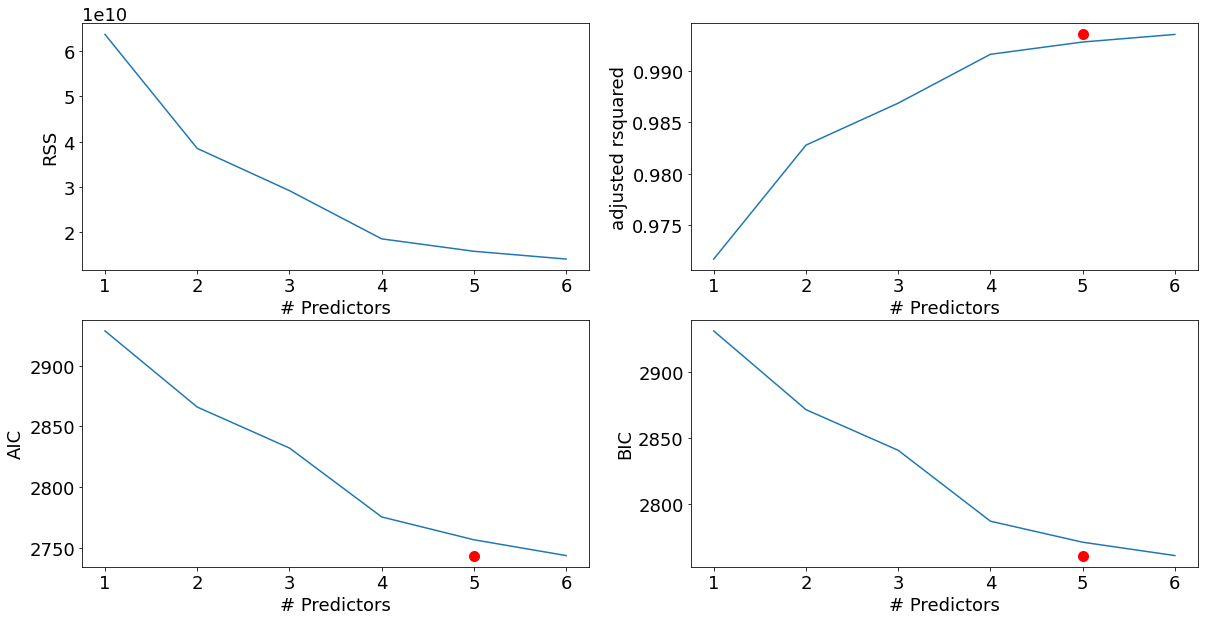

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

From the plots we can see that according to BIC, the best performer is the model with 5 variables 0th variable which is inlined with AIC and adjusted $R^2$. Again, no one measure is going to give us an entirely accurate picture... but they all agree that a model with 5 or fewer predictors is insufficient.

## Forward and Backward Stepwise Selection
We can also use a similar approach to perform forward stepwise
or backward stepwise selection, using a slight modification of the functions we defined above:

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  6 models on 1 predictors in 0.017567873001098633 seconds.
Processed  5 models on 2 predictors in 0.017925739288330078 seconds.
Processed  4 models on 3 predictors in 0.01659250259399414 seconds.
Processed  3 models on 4 predictors in 0.010235309600830078 seconds.
Processed  2 models on 5 predictors in 0.008545875549316406 seconds.
Processed  1 models on 6 predictors in 0.005459308624267578 seconds.
Total elapsed time: 0.10541200637817383 seconds.


In [ ]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              4390.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   2.30e-100
Time:                        01:01:42   Log-Likelihood:                         -1463.3
No. Observations:                 128   AIC:                                      2929.
Df Residuals:                     127   BIC:                                      2932.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We see that using forward stepwise selection, the best one-variable
model contains only `Square feet distance`, and the best two-variable model additionally
includes `SqFT` and 'Bathrooms'. Let's see how the models stack up against best subset selection:

In [ ]:
print(models_best.loc[1, "model"].summary())
print(models_fwd.loc[1, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              4390.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   2.30e-100
Time:                        01:01:49   Log-Likelihood:                         -1463.3
No. Observations:                 128   AIC:                                      2929.
Df Residuals:                     127   BIC:                                      2932.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

For this data, the best one-variable through six-variable
models are each identical for
 

1.   best subset 
2.   forward selection

with feature = SqFt = 0th index column





## Backward Selection
Not much has to change to implement backward selection... just looping through the predictors in reverse!

In [ ]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  6 models on 5 predictors in 0.020808696746826172 seconds.
Processed  5 models on 4 predictors in 0.010507345199584961 seconds.
Processed  4 models on 3 predictors in 0.009870290756225586 seconds.
Processed  3 models on 2 predictors in 0.013079166412353516 seconds.
Processed  2 models on 1 predictors in 0.01160430908203125 seconds.
Total elapsed time: 0.07957601547241211 seconds.


In [ ]:
print(models_bwd.loc[1, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              4390.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   2.30e-100
Time:                        01:04:06   Log-Likelihood:                         -1463.3
No. Observations:                 128   AIC:                                      2929.
Df Residuals:                     127   BIC:                                      2932.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

For this data, the best one-variable through six-variable
models are each identical for best subset and forward selection.
However, the best five-variable models identified by forward stepwise selection,
backward stepwise selection, and best subset selection are different:

In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[5, "model"].params)

------------
Best Subset:
------------
SqFt               58.845938
Bedrooms         7699.840093
Offers         -10213.062022
Brick           19887.199509
Neighborhood     9846.266528
dtype: float64


In [ ]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[5, "model"].params)

-----------------
Foward Selection:
-----------------
SqFt               58.845938
Offers         -10213.062022
Brick           19887.199509
Neighborhood     9846.266528
Bedrooms         7699.840093
dtype: float64


In [ ]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[5, "model"].params)

-------------------
Backward Selection:
-------------------
SqFt               58.845938
Bedrooms         7699.840093
Offers         -10213.062022
Brick           19887.199509
Neighborhood     9846.266528
dtype: float64


# **a) Show your best model features**

In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[6, "model"].rsquared)

------------
Best Subset:
------------
0.993883993561615


In [ ]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[6, "model"].rsquared)

-----------------
Foward Selection:
-----------------
0.993883993561615


In [ ]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[5, "model"].rsquared)


-------------------
Backward Selection:
-------------------
0.9931224410228014


# **b) Compare your model performance against the model Q1**

In [ ]:
print(models_best.loc[6, "model"].summary())
print(models_fwd.loc[6, "model"].summary())
print(models_bwd.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              3304.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   1.82e-132
Time:                        02:22:02   Log-Likelihood:                         -1365.7
No. Observations:                 128   AIC:                                      2743.
Df Residuals:                     122   BIC:                                      2761.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In question 1 we used the model with all 6 predictor variables and with best, forward and backward selection the model with 6,6 and 5 respectively of them as the explanatory variable.



------------
Best Subset 6 features:
------------
0.993883993561615

-----------------
Foward Selection 6 features :
-----------------
0.993883993561615

-------------------
Backward Selection 5 features:
-------------------
0.9931224410228014



# **a) Implement Ridge/Lasso regression for the dataset**

# **b) Compare the lasso/ridge regression model output with Q1, and Q2 models performance metrics**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(Xtrain, Ytrain)

Lasso(alpha=1)

In [ ]:
print('R squared training set', round(lasso.score(Xtrain, Ytrain)*100, 2))
print('R squared test set', round(lasso.score(Xtrain, Ytrain)*100, 2))

R squared training set 84.79
R squared test set 84.79


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(Xtrain, Ytrain)

Ridge()

In [ ]:
print('R squared training set', round(ridge.score(Xtrain, Ytrain)*100, 2))
print('R squared test set', round(ridge.score(Xtrain, Ytrain)*100, 2))

R squared training set 84.79
R squared test set 84.79


Comparision with model Q1:

R squared value for Q1 was 84.57 which got improved after employing regularization techniques like lasso and ridge regression to 84.79

In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[5, "model"].rsquared)

------------
Best Subset:
------------
0.9931224410228014


In [ ]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[5, "model"].rsquared)


-----------------
Foward Selection:
-----------------
0.9931224410228014


In [ ]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[5, "model"].rsquared)

-------------------
Backward Selection:
-------------------
0.9931224410228014


SqFt         
Bedrooms     
Offers      
Brick       
Neighborhood  

As per the model selection it is clear that above mentioned 5 features are enough to catch patterns in data for backward selection and for best, forward all 6 feature model is selected.

Thus keeping 5 features and performing regularization using lasso and ridge methods.


In [ ]:
# excluding bathroom feature
Xtrain = np.delete(Xtrain, 3, axis=1)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(Xtrain, Ytrain)

Lasso(alpha=1)

In [ ]:
print('R squared training set', round(lasso.score(Xtrain, Ytrain)*100, 2))
print('R squared test set', round(lasso.score(Xtrain, Ytrain)*100, 2))

R squared training set 68.41
R squared test set 68.41


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(Xtrain, Ytrain)

Ridge()

In [ ]:
print('R squared training set', round(ridge.score(Xtrain, Ytrain)*100, 2))
print('R squared test set', round(ridge.score(Xtrain, Ytrain)*100, 2))

R squared training set 68.41
R squared test set 68.41


From this it is clear that r squared is dropped after having removed bathroom freature from the 6 feature list. 
A low R-squared value indicates that your independent variable is not explaining much in the variation of your dependent variable. The higher the R-squared, the better the model fits your data


Thus model with all features is selected and it is feed to lasso and ridge to get max r squared as 84.79%